In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_64539_R')

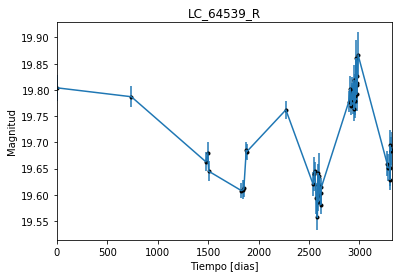

In [2]:
data = np.genfromtxt('LC_64539_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_64539_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

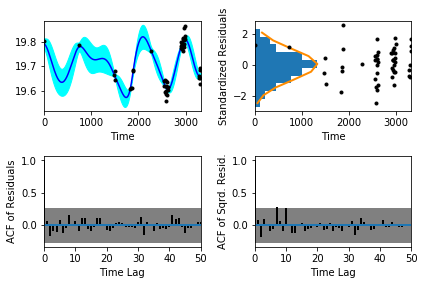

In [5]:
sample.assess_fit()

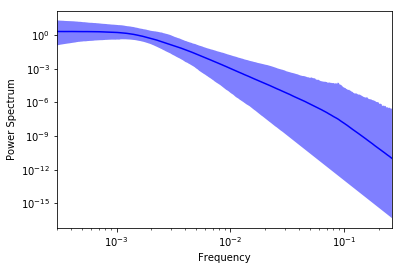

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_64539_R')

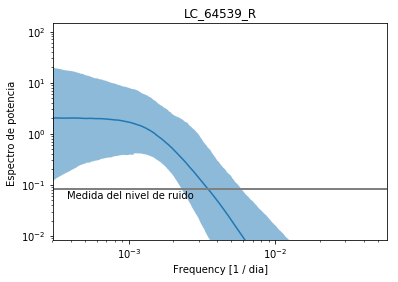

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_64539_R')

Text(0.5,1,'Prediccion , valor esperado LC_64539_R')

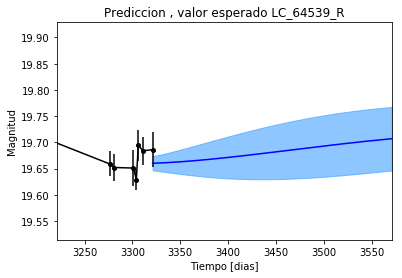

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_64539_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_64539_R')

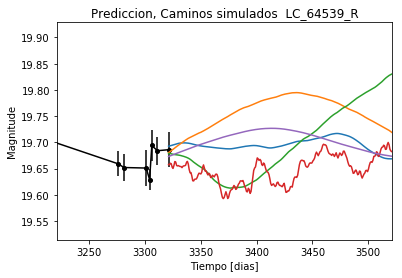

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_64539_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_64539_R')

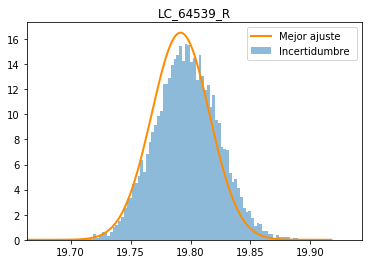

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_64539_R')

Text(0.5,1,'Interpolacion, camino simulado LC_64539_R')

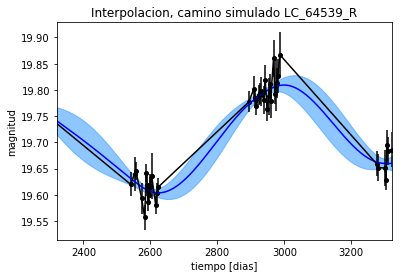

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_64539_R')

Text(0.5,1,'Interpolacion, camino simulado LC_64539_R')

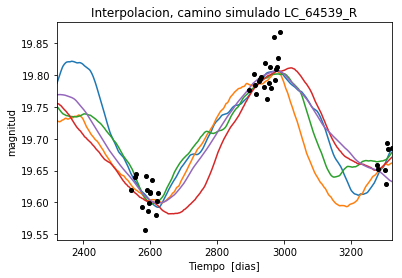

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_64539_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 302.199049
Median: 0.00350824932941
Standard deviation: 0.084993149013
68% credibility interval: [ 0.00059334  0.05665691]
95% credibility interval: [  3.38150194e-04   3.40045718e-01]
99% credibility interval: [  3.10697675e-04   4.85487836e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 917.663190938
Median: 0.00156922887537
Standard deviation: 0.0420016857478
68% credibility interval: [ 0.00050665  0.01325879]
95% credibility interval: [ 0.00032599  0.12588727]
99% credibility interval: [  3.08100892e-04   3.18884138e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 321.110527591
Median: 0.00539726975085
Standard d

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 774.29169109
Median: 124.638099758
Standard deviation: 1.81860562224
68% credibility interval: [ 122.67819803  126.12962911]
95% credibility interval: [ 120.0716612   127.04793271]
99% credibility interval: [ 118.13853845  127.42204036]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 317.289495446
Median: 0.241473189524
Standard deviation: 1.01374836761
68% credibility interval: [ 0.03426767  1.66749514]
95% credibility interval: [ 0.01257113  3.33637959]
99% credibility interval: [ 0.00981612  5.01813039]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 637.654325831
Median: 0.0782115330384
Standard deviation: 2.13519093907
68% credibility interval: [ 0.00404848  1.48781224]
95% credibility interval: [  4.35680353e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1607.07186648
Median: 3.34271587758e-28
Standard deviation: 3.5012501216e+35
68% credibility interval: [  3.65006721e-73   6.78168338e-01]
95% credibility interval: [  3.87086908e-118   5.13243347e+030]
99% credibility interval: [  1.66995704e-169   3.32242819e+033]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2737.47806799
Median: 19.7159915066
Standard deviation: 0.0402778025555
68% credibility interval: [ 19.68776215  19.75048167]
95% credibility interval: [ 19.64640282  19.80699776]
99% credibility interval: [ 19.59284314  19.8625951 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 482.650865051
Median: 0.00340464990416
Standard deviation: 0.116905718675
68% credibility interval: [ 0.          0.15430263]
95% credibility interval: [ 0.        0.444998]
99% credibility interval: [ 0.          0.50645313]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 482.650865051
Median: 0.00340464990416
Standard deviation: 0.116905718675
68% credibility interval: [ 0.          0.15430263]
95% credibility interval: [ 0.        0.444998]
99% credibility interval: [ 0.          0.50645313]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 325.557527014
Median: 0.0
Standard deviation: 0.000732617951883
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 774.29169109
Median: 124.638099758
Standard deviation: 1.81860562224
68% credibility interval: [ 122.67819803  126.12962911]
95% credibility interval: [ 120.0716612   127.04793271]
99% credibility interval: [ 118.13853845  127.42204036]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1340.32196921
Median: 0.00827660531802
Standard deviation: 0.0116167416557
68% credibility interval: [ 0.00460445  0.01611966]
95% credibility interval: [ 0.00298248  0.03673647]
99% credibility interval: [ 0.0023041   0.06846229]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2609.84645526
Median: 0.97163522676
Standard deviation: 0.148770230708
68% credibility interval: [ 0.84400978  1.1287038 ]
95% credibility interval: [ 0.74156658  1.32414331]
99% credibility interval: [ 0.68150986  1.46390681]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1313.11949815
Median: 1.01340404259e-05
Standard deviation: 0.00334662003727
68% credibility interval: [  3.61596399e-08   2.56571722e-04]
95% credibility interval: [  6.70849915e-36   2.85940636e-03]
99% credibility interval: [  6.50471178e-38   1.68560454e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 302.199049
Median: (-0.0220429806405+0j)
Standard deviation: 0.908149235077
68% credibility interval: [-0.35598589-1.69093063j -0.00372806-0.03325128j]
95% credibility interval: [ -2.13657026e+00+0.j          -2.12466033e-03-0.00712807j]
99% credibility interval: [ -3.05041004e+00+0.j          -1.95217107e-03-0.00937349j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 917.663190938
Median: (-0.00985975581335+0.0121391843857j)
Standard deviation: 0.78050942492
68% credibility interval: [-0.08330743+0.71613868j -0.00318339+0.00663031j]
95% credibility interval: [-0.79097304+0.84106533j -0.00204824+0.00891452j]
99% credibility interval: [ -2.00360813e+00+0.78694503j  -1.93585500e-03+0.j        ]
Posterior summary for par